# TensorFlow Core Learning Algorithms
Main focused algorithms include:
- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

##  Linear Regression
Numeric prediction with linear correspondence (plot a best-fit)

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output
from six.moves import urllib

#import tensorflow.compact.v1.feature_column as fc
import tensorflow as tf

In [2]:
dftrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
dfeval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")
y_train = dftrain.pop('survived') # 'survived' = Label
y_eval = dfeval.pop('survived')

In [3]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [4]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [4]:
dftrain.shape

(627, 9)

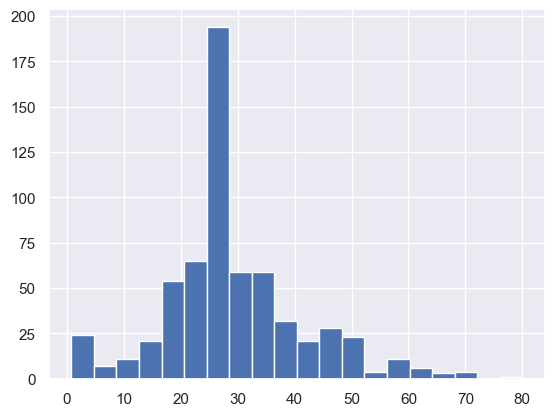

In [5]:
dftrain.age.hist(bins=20)
sns.set_theme(style="dark")

<AxesSubplot: >

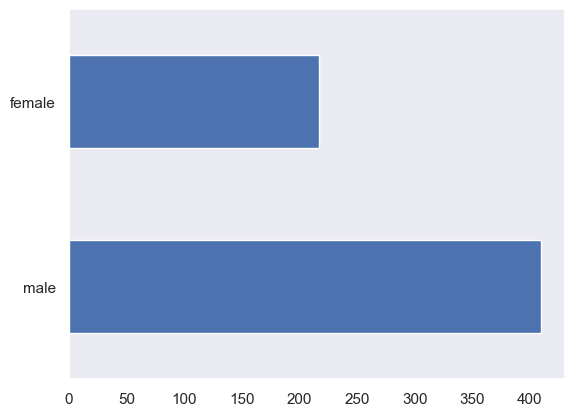

In [6]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot: >

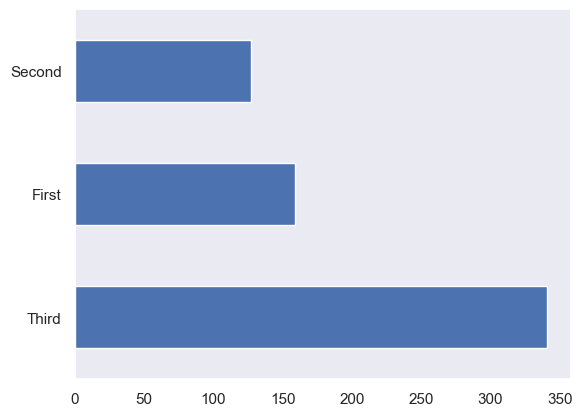

In [7]:
dftrain['class'].value_counts().plot(kind='barh')

C:\Users\igora\AppData\Local\Temp\ipykernel_14600\305364371.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.concat([dftrain, y_train], axis=1).groupby('sex').agg('mean')['survived'].plot(kind='barh')


<AxesSubplot: ylabel='sex'>

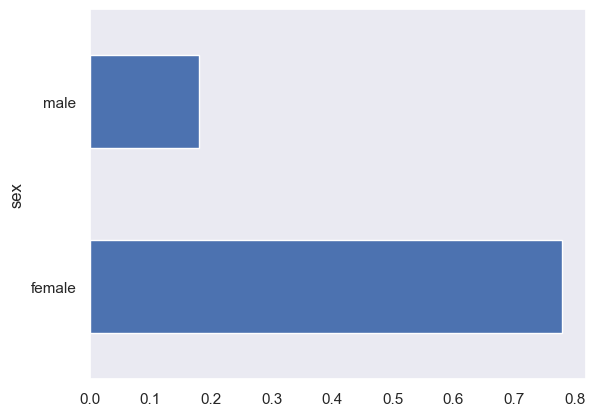

In [8]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').agg('mean')['survived'].plot(kind='barh')

Analysis conclusions:
- The majority of passengers are in their 20's or 30's
- The maojrity of passengers are male
- The majority of passengers are in "Third" class
- Females have mich higher chance of survival

## Training and Testing Data


In [9]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
       'embark_town', 'alone']
NUMERIC_COLUMNS=['age','fare']

feature_columns=[]
for feature in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature,vocabulary))

for feature in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature, dtype=tf.float32))
    
#print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
